In [79]:
import cv2

I = cv2.imread('mandril.jpg')

cv2.imshow("Mandril",I) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

cv2.imwrite("m.png",I)

True

In [80]:
print(I.shape) # dimensions /rows, columns, depth/
print(I.size) # number of bytes
print(I.dtype) # data type

(512, 512, 3)
786432
uint8


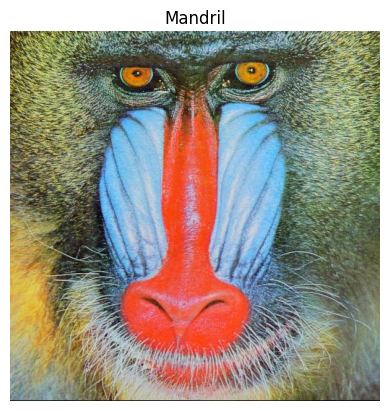

In [81]:
import matplotlib.pyplot as plt
I = plt.imread('mandril.jpg')

plt.figure(1) # create figure
plt.imshow(I) # add image
plt.title('Mandril') # add title
plt.axis('off') # disable display of the coordinate system
plt.show() # display

In [4]:
plt.imsave('mandril.png',I)

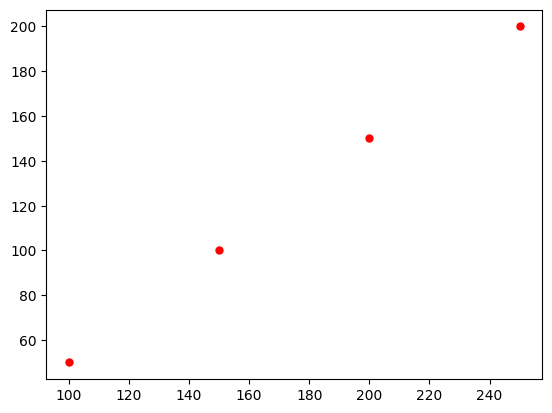

In [13]:
x = [ 100, 150, 200, 250]
y = [ 50, 100, 150, 200]
plt.plot(x,y,'r.',markersize=10)

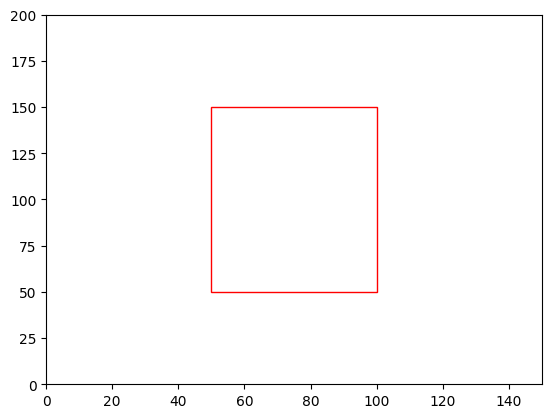

In [ ]:
from matplotlib.patches import Rectangle

I = plt.imread('mandril.jpg')

fig,ax = plt.subplots(1) 
rect = Rectangle((50,50),50,100,fill=False, ec='r'); # ec - edgecolour
ax.add_patch(rect) # display

# ustawienie odpowiednich limitów osi aby prostokąt był widoczny
ax.set_xlim(0, 150)
ax.set_ylim(0, 200)

plt.show()


In [7]:
IG = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
cv2.imshow("Mandril Gray",IG) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

In [25]:
IHSV = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
cv2.imshow("Mandril HSV",IHSV) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

In [14]:
# wyswiwtlic skladowe obrazu po konwersji
IH = IHSV[:,:,0]
IS = IHSV[:,:,1]
IV = IHSV[:,:,2]

cv2.imshow("Mandril H",IH) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

In [ ]:
cv2.imshow("Mandril S",IS) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

In [ ]:
cv2.imshow("Mandril V",IV) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

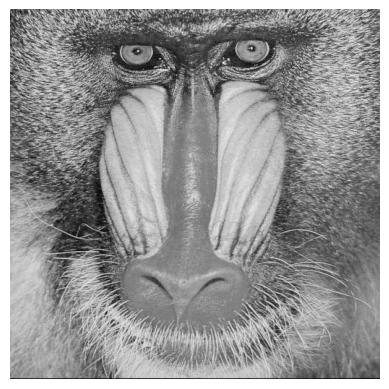

In [17]:
def rgb2gray(I):
    return 0.299*I[:,:,0] + 0.587*I[:,:,1] + 0.114*I[:,:,2]

I = plt.imread('mandril.jpg')
IG = rgb2gray(I)
plt.figure(1) # create figure
plt.imshow(IG) # add image
plt.axis('off') # disable display of the coordinate system
plt.gray()
plt.show() # display

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


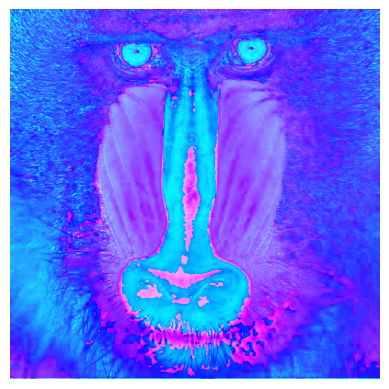

In [ ]:
import matplotlib
import numpy as np

I = plt.imread('mandril.jpg')
_HSV = matplotlib.colors.rgb_to_hsv(I.astype(np.float32)) # bo jest jakas niezgodnosc wersji np z matplotlib
plt.figure(1) # create figure
plt.imshow(_HSV) # add image
plt.axis('off')
plt.show()

In [64]:
I = cv2.imread('mandril.jpg')
height, width =I.shape[:2] # retrieving elements 1 and 2, i.e. thecorresponding height and width
scale = 1.75 # scale factor
Ix2 = cv2.resize(I,(int(scale*height),int(scale*width)))
cv2.imshow("Big Mandrill",Ix2)
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

In [65]:
mandril = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
L = cv2.imread('lena.png')
lena = cv2.cvtColor(L, cv2.COLOR_BGR2GRAY)

sum = cv2.add(mandril, lena)
cv2.imshow("mandril+lena",sum) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

In [66]:
diff = cv2.subtract(mandril, lena)
cv2.imshow("mandril-lena",diff) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

In [67]:
result = cv2.multiply(mandril, lena, scale=1/255.0)
cv2.imshow("mandril*lena",result) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

In [ ]:
#kombinacja liniowa
alpha = 0.8  # waga pierwszego obrazu
beta = 0.2   # waga drugiego obrazu
gamma = 0    # stala dodawana do piksela

result = cv2.addWeighted(mandril, alpha, lena, beta, gamma)
cv2.imshow("kombinacja liniowa",result) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

In [72]:
#modul roznicy
result = cv2.absdiff(mandril, lena)
cv2.imshow("modul roznicy",result) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows()

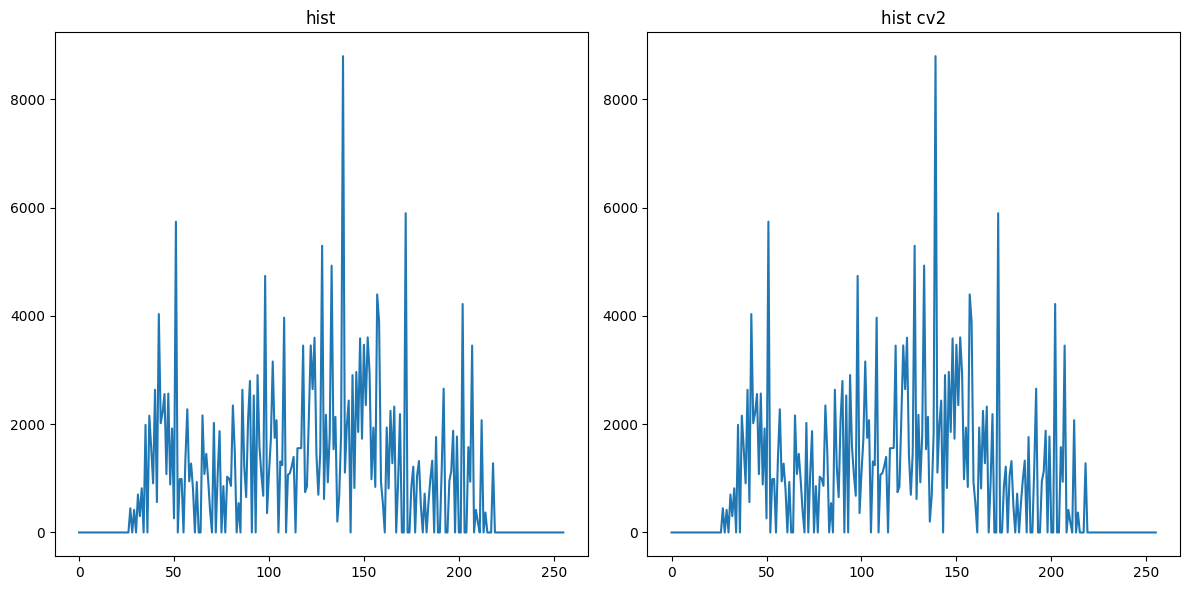

In [75]:
def hist(img):
    h = np.zeros((256, 1), np.float32)
    height, width = img.shape[:2]
    
    for y in range(height):
        for x in range(width):
            intensity = img[y, x]
            h[intensity] += 1

    return h

histogram = hist(lena)
hist_cv = cv2.calcHist([lena], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(histogram)
ax[0].set_title('hist')
ax[1].plot(hist_cv)
ax[1].set_title('hist cv2')

plt.tight_layout()
plt.show()

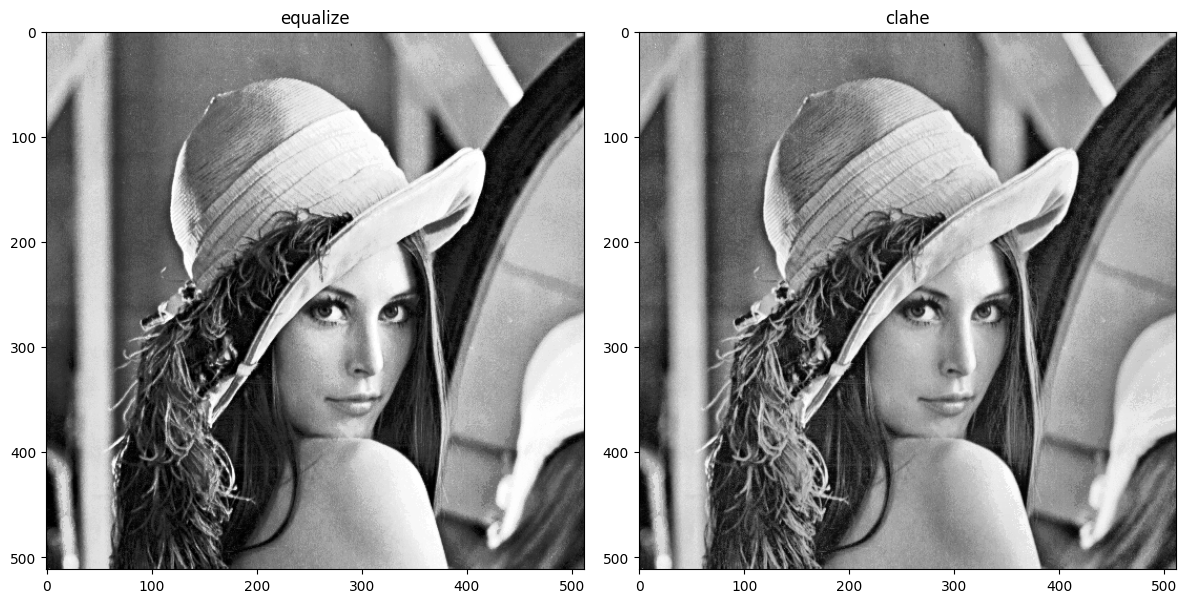

In [76]:
image_equalized = cv2.equalizeHist(lena)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(lena)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_equalized, cmap='gray')
ax[0].set_title('equalize')
ax[1].imshow(image_clahe, cmap='gray')
ax[1].set_title('clahe')

plt.tight_layout()
plt.show()


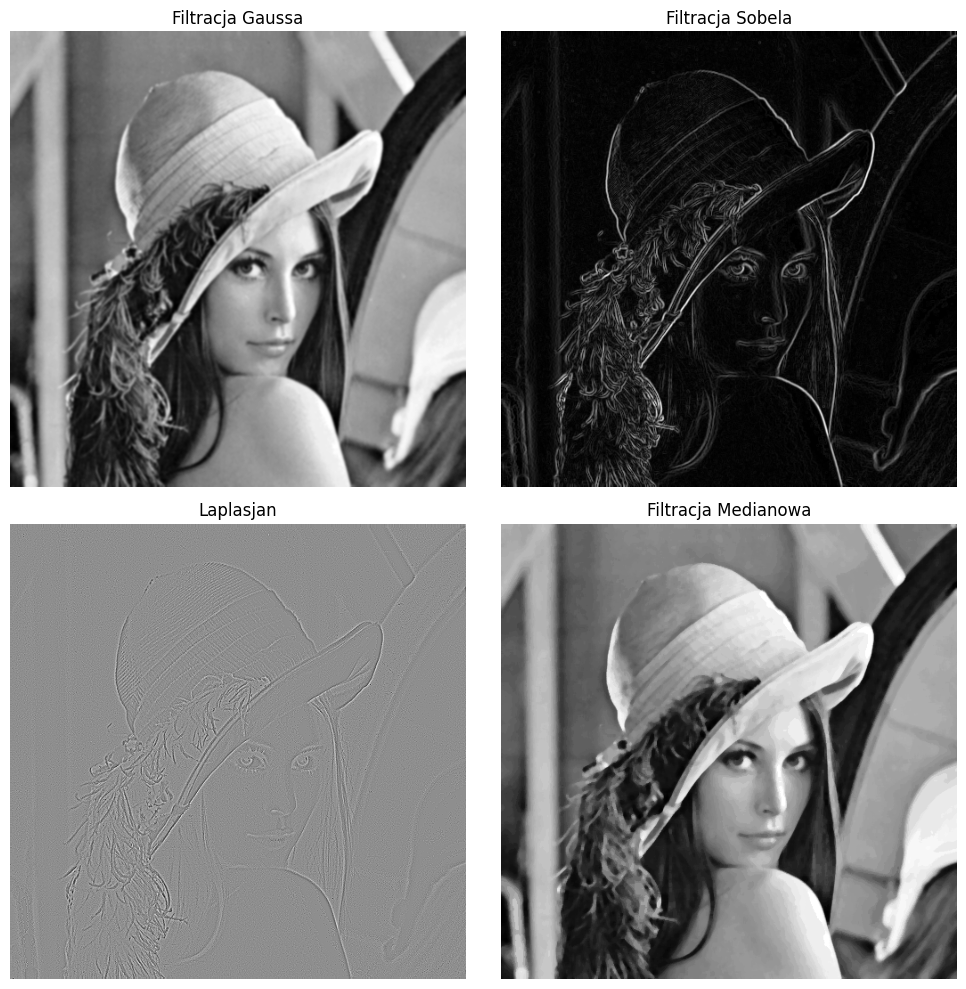

In [ ]:
#gauss
gaussian_blur = cv2.GaussianBlur(lena, (5, 5), 0)

#sobel
sobel_x = cv2.Sobel(lena, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(lena, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  #kombinacja obu kierunków

#laplasjan
laplacian = cv2.Laplacian(lena, cv2.CV_64F)

#medianowa
median_blur = cv2.medianBlur(lena, 5)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(gaussian_blur, cmap='gray')
ax[0, 0].set_title('gauss')
ax[0, 0].axis('off')

ax[0, 1].imshow(sobel_combined, cmap='gray')
ax[0, 1].set_title('sobel')
ax[0, 1].axis('off')

ax[1, 0].imshow(laplacian, cmap='gray')
ax[1, 0].set_title('laplasjan')
ax[1, 0].axis('off')

ax[1, 1].imshow(median_blur, cmap='gray')
ax[1, 1].set_title('medianowa')
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()


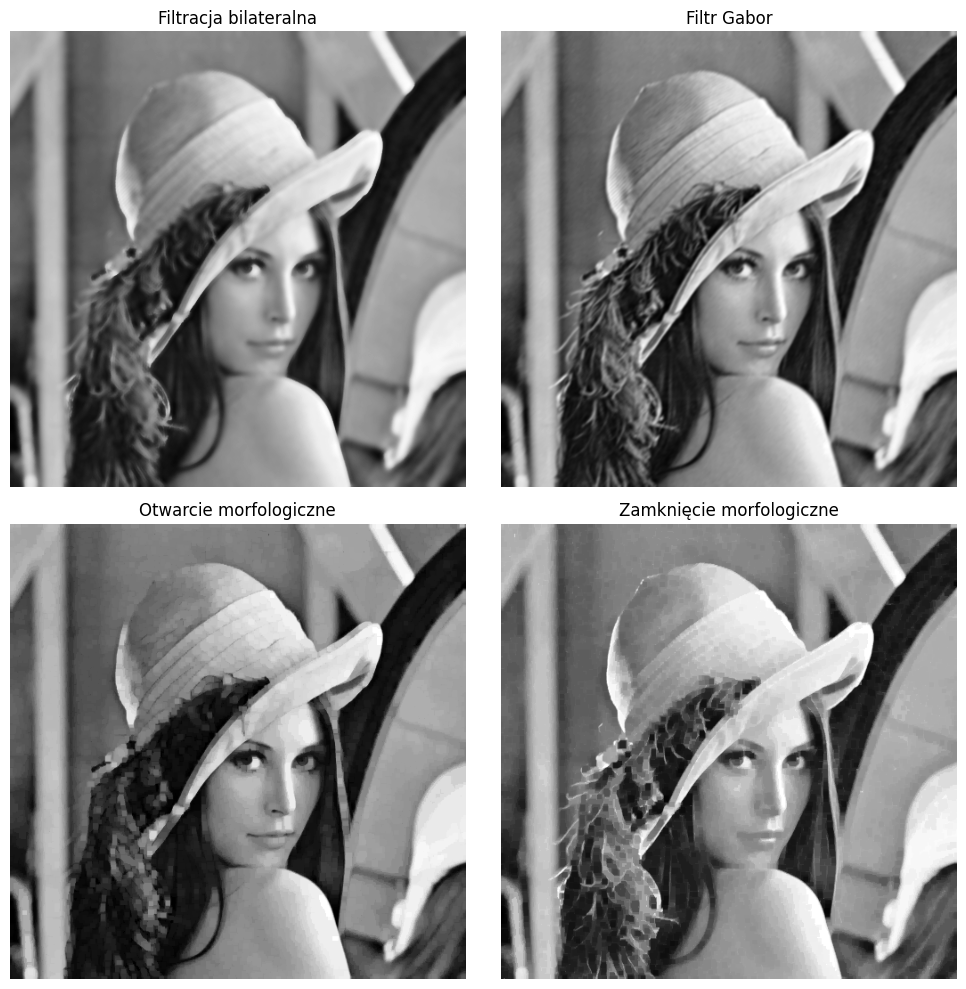

In [ ]:
#bilateralna
bilateral_filter = cv2.bilateralFilter(lena, d=9, sigmaColor=75, sigmaSpace=75)

#filtry gabora
gabor_kernel = cv2.getGaborKernel(ksize=(5, 5), sigma=1.0, theta=np.pi/4, lambd=10.0, gamma=0.5, psi=0)
gabor_filter = cv2.filter2D(lena, cv2.CV_32F, gabor_kernel)

#operacje morfologiczne - otwarcie i zamknięcie
kernel = np.ones((5, 5), np.uint8)
morph_open = cv2.morphologyEx(lena, cv2.MORPH_OPEN, kernel)
morph_close = cv2.morphologyEx(lena, cv2.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(bilateral_filter, cmap='gray')
ax[0, 0].set_title('bilateralna')
ax[0, 0].axis('off')

ax[0, 1].imshow(gabor_filter, cmap='gray')
ax[0, 1].set_title('gabor')
ax[0, 1].axis('off')

ax[1, 0].imshow(morph_open, cmap='gray')
ax[1, 0].set_title('otwarcie')
ax[1, 0].axis('off')

ax[1, 1].imshow(morph_close, cmap='gray')
ax[1, 1].set_title('zamknięcie')
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()